In [662]:
import pickle
import numpy as np

In [663]:
import matplotlib.pyplot as plt
%matplotlib inline

# RCV1

In [664]:
with open('../results-thesis/rcv1-th-square.pickle', 'rb') as f:
# with open('../results-thesis/rcv1-th-final.pickle', 'rb') as f:
# with open('../results-thesis/rcv1-th-final-nosparse.pickle', 'rb') as f:
# with open('../results-thesis/rcv1-th-cste.1.pickle', 'rb') as f:
# with open('../results-thesis/rcv1-th-cste.01-epochdecay.pickle', 'rb') as f:
    
    
    
    results_rcv1 = pickle.load(f)

In [665]:
ts, losses, timers, _, _, _ = results_rcv1['sgd']
min(losses)

0.08488581329584122

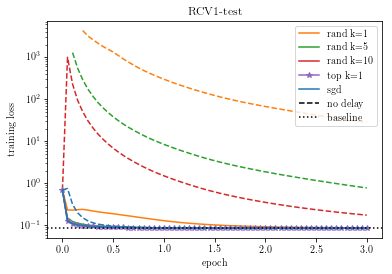

In [666]:
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def plot_rcv1_th(ax, zoom):
    colors = [
        ("k=1", "C1-"),
        ("k=1 no delay", "C1--"),
        ("k=5", "C2-"),
        ("k=5 no delay", "C2--"),
        ("k=10", "C3-"),
        ("k=10 no delay", "C3--"),
    #     ("top k=10", "C4-"),
        ("top k=1", "C4*-"),
        ("sgd", "C0-"),
        ("sgd no delay", "C0--"),
    ]

    for label, col in colors:
        ts, losses, timers, _, _, _ = results_rcv1[label]
    #     ts, losses, timers = results_rcv1[label]
        label = 'rand ' + label if label[0] == 'k' else label
        ax.semilogy(np.array(ts) / 677399, losses, col, label=None if "no delay" in label else label);

    ax.plot([], [], c='black', linestyle='--', label='no delay')
    ax.axhline(0.0849, c='black', linestyle=':', label='baseline')

    ax.legend()
    ax.set_title('RCV1-test')
    ax.set_xlabel('epoch')
    ax.set_ylabel('training loss');
    
    if zoom:
        ax.set_ylim(0.0849 - 0.01, 1.);
        ax.set_xlim(0., 1.);

fig, ax = plt.subplots(1)
plot_rcv1_th(ax, zoom=False)

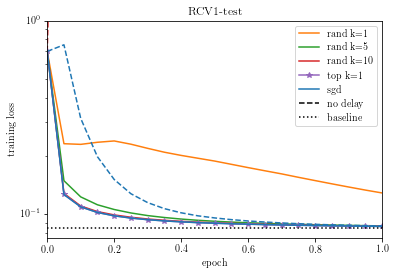

In [667]:
fig, ax = plt.subplots(1)
plot_rcv1_th(ax, zoom=True)

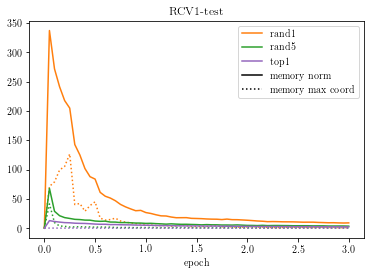

In [674]:
def plt_rcv1_mem_norm(ax):
    ts = np.array(results_rcv1['k=1'][0])
    ax.plot(ts / 677399, results_rcv1['k=1'][3], 'C1-', label='rand1')
    ax.plot(ts / 677399, results_rcv1['k=1'][4], 'C1:')
    
    ax.plot(ts / 677399, results_rcv1['k=5'][3], 'C2-', label='rand5')
    ax.plot(ts / 677399, results_rcv1['k=5'][4], 'C2:')

    ax.plot(ts / 677399, results_rcv1['top k=1'][3], 'C4-', label='top1')
    ax.plot(ts / 677399, results_rcv1['top k=1'][4], 'C4:')
    
    ax.plot([], [], c='black', linestyle='-', label='memory norm')
    ax.plot([], [], c='black', linestyle=':', label='memory max coord')

    ax.set_title('RCV1-test')
    ax.set_xlabel('epoch')
    ax.legend();

fig, ax = plt.subplots(1)
plt_rcv1_mem_norm(ax)

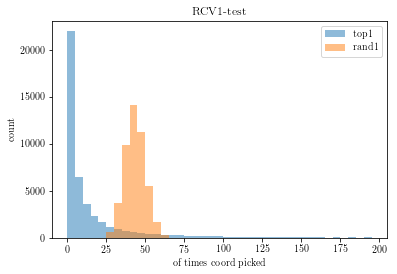

In [675]:
def plt_rcv1_coord(ax):
    ax.hist(np.array(results_rcv1['top k=1'][5]), label='top1', alpha=0.5, bins=range(0,200,5))
    ax.hist(np.array(results_rcv1['k=1'][5]), label='rand1', alpha=0.5, bins=range(0,200,5))

    ax.set_xlabel('# of times coord picked')
    ax.set_ylabel('count')
    ax.set_title('RCV1-test')
    ax.legend();

fig, ax = plt.subplots(1)
plt_rcv1_coord(ax);

# epsilon

In [676]:
with open('../results-thesis/epsilon-th-square.pickle', 'rb') as f:
    results_epsilon = pickle.load(f)

In [677]:
results_epsilon.keys()

dict_keys(['sgd', 'sgd no delay', 'k=1 no delay', 'k=1', 'k=2 no delay', 'k=2', 'k=3 no delay', 'k=3', 'top k=1'])

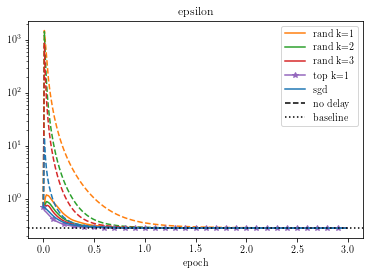

In [679]:

def plt_epsilon_th(ax, zoom):
    colors = [
        ("k=1", "C1-"),
        ("k=1 no delay", "C1--"),
        ("k=2", "C2-"),
        ("k=2 no delay", "C2--"),
        ("k=3", "C3-"),
        ("k=3 no delay", "C3--"),
        ("top k=1", "C4*-"),
        ("sgd", "C0-"),
        ("sgd no delay", "C0--"),
    ]

    for label, col in colors:
        ts, losses, timers, _, _, _ = results_epsilon[label]
        label = 'rand ' + label if label[0] == 'k' else label
        plt.semilogy(np.array(ts) / 400000, losses, col, label=label if "no delay" not in label else None, markevery=10);

    ax.plot([], [], c='black', linestyle='--', label='no delay')
    ax.axhline(0.283, c='black', linestyle=':', label='baseline')


    ax.legend()
    ax.set_title('epsilon')
    ax.set_xlabel('epoch')
#     ax.set_ylabel('training loss')
    if zoom:
        ax.set_ylim(0.283 - 0.01, 1.);
        ax.set_xlim(0., 1.);


fig, ax = plt.subplots(1)
plt_epsilon_th(ax, zoom=False)

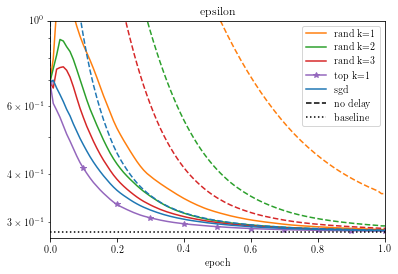

In [680]:
fig, ax = plt.subplots(1)
plt_epsilon_th(ax, zoom=True)

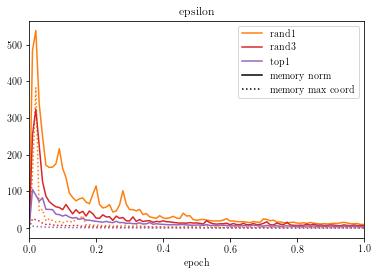

In [681]:
def plt_epsilon_mem_norm(ax):
    ts = np.array(results_epsilon['k=1'][0])
    ax.plot(ts / 400000, results_epsilon['k=1'][3], 'C1-', label='rand1')
    ax.plot(ts / 400000, results_epsilon['k=1'][4], 'C1:')
    
    ax.plot(ts / 400000, results_epsilon['k=3'][3], 'C3-', label='rand3')
    ax.plot(ts / 400000, results_epsilon['k=3'][4], 'C3:')

    ax.plot(ts / 400000, results_epsilon['top k=1'][3], 'C4-', label='top1')
    ax.plot(ts / 400000, results_epsilon['top k=1'][4], 'C4:')
    
    ax.plot([], [], c='black', linestyle='-', label='memory norm')
    ax.plot([], [], c='black', linestyle=':', label='memory max coord')

    ax.set_title('epsilon')
    ax.set_xlabel('epoch')
    ax.set_xlim(0,1)
    ax.legend();

fig, ax = plt.subplots(1)
plt_epsilon_mem_norm(ax)

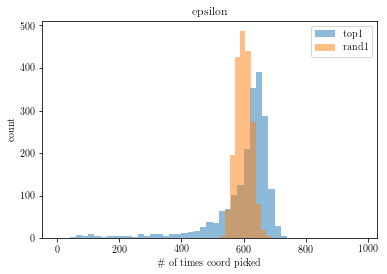

In [682]:
def plt_epsilon_coord(ax):
    ax.hist(np.array(results_epsilon['top k=1'][5]), label='top1', alpha=0.5, bins=range(0,1000,20))
    ax.hist(np.array(results_epsilon['k=1'][5]), label='rand1', alpha=0.5)

    ax.set_xlabel('\# of times coord picked')
    ax.set_ylabel('count')
    ax.set_title('epsilon')
    ax.legend();

fig, ax = plt.subplots(1)
plt_epsilon_coord(ax);

## Save all

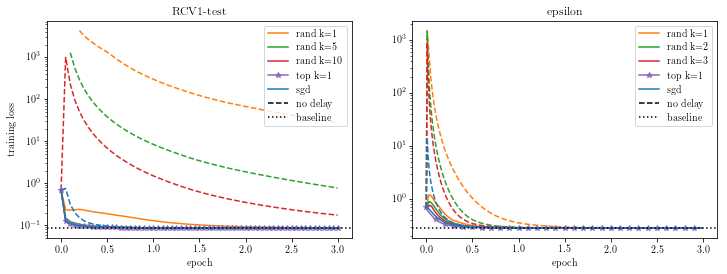

In [683]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plot_rcv1_th(ax1, False)
plt_epsilon_th(ax2, False)
fig.savefig('figures/th.pdf')

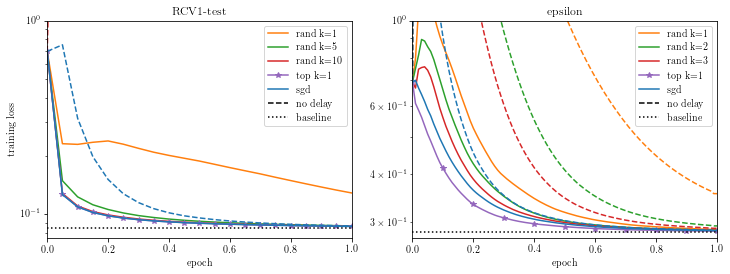

In [684]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plot_rcv1_th(ax1, True)
plt_epsilon_th(ax2, True)
fig.savefig('figures/th-zoom.pdf')

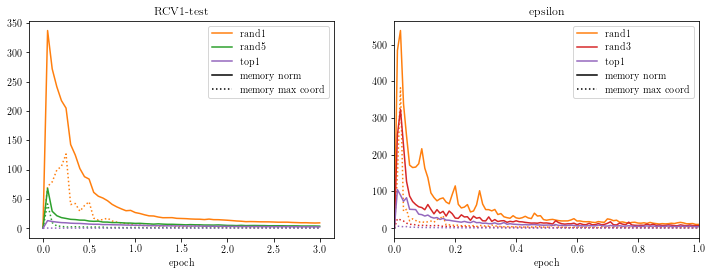

In [685]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt_rcv1_mem_norm(ax1)
plt_epsilon_mem_norm(ax2)
fig.savefig('figures/mem-norm.pdf')

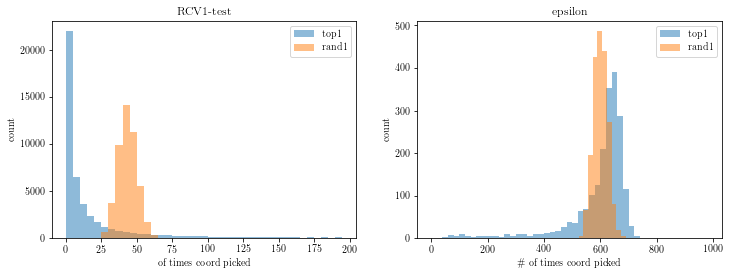

In [686]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt_rcv1_coord(ax1)
plt_epsilon_coord(ax2)
fig.savefig('figures/coord-pick.pdf')

# Multi core

In [687]:
with open('../results-thesis/rcv1-par.pickle', 'rb') as f:
    results_rcv1 = pickle.load(f)
results_rcv1

{'cores': [1, 5, 10, 15, 20, 25],
 'models': ['sgd', 'rand100', 'top1'],
 'repeat': 3,
 'timers': array([[[   4.60334444,    4.77570009,    4.831882  ],
         [   1.81637037,    1.75794125,    1.71865845],
         [   1.10261476,    1.08356118,    1.08801866],
         [   0.86868465,    0.8524552 ,    0.87054753],
         [   0.74565244,    0.80271059,    0.84725136],
         [   0.78283691,    0.70113438,    0.69169575]],
 
        [[  27.5875206 ,   29.31312561,   29.49572372],
         [  61.72451782,   63.28336334,   66.81115723],
         [  94.73052216,   86.95832825,   82.34667969],
         [ 187.19720459,  130.1113739 ,  112.06069946],
         [   0.        ,  150.28796387,    0.        ],
         [   0.        ,    0.        ,    0.        ]],
 
        [[ 100.22387695,  104.46958923,  105.33001709],
         [  27.02394104,   26.91656113,   21.31273651],
         [  15.15344143,   15.15714455,   15.1267128 ],
         [  10.16752434,   10.19365501,   10.19454765],
 

In [688]:
def plot_results(res, num_samples, name=None, cut=False):
    timers = res['timers']
    timers = np.sort(timers, axis=-1)
    baseline = np.expand_dims(np.expand_dims(timers[:, 0, 1], 1), 1)
#     baseline = np.expand_dims(np.expand_dims(timers[:, 0, 0], 1), 1)
    speed_ups = baseline / timers
    ts = res['ts']
    ts = np.sort(ts, axis=-1)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
    
    # speed up
    for i, speed_up in enumerate(speed_ups):
        ax1.plot(res['cores'], speed_ups[i, :, 1], label=res['models'][i])
        ax1.fill_between(res['cores'], speed_ups[i, :, 0], speed_ups[i, :, 2], facecolor='C{}'.format(i), alpha=0.2)

    ax1.plot([1,25], [1,25], ':', label='ideal')
    ax1.set_xlabel('\# of cores')
    ax1.set_ylabel('speed up')
    ax1.set_title('Relative speed up for {}'.format(name))
    ax1.legend();
    
    # absolute time
    for i, speed_up in enumerate(speed_ups):
        if not cut or 'rand' not in res['models'][i]:
            ax2.fill_between(res['cores'][0:], timers[i, :, 2], timers[i, :, 0], facecolor='C{}'.format(i), alpha=0.2)
            ax2.plot(res['cores'], timers[i, :, 1], label=res['models'][i])
        else:            
            ax2.fill_between(res['cores'][:-2], timers[i, :, 2][:-2], timers[i, :, 0][:-2], facecolor='C{}'.format(i), alpha=0.2)
            ax2.plot(res['cores'][:-2], timers[i, :, 1][:-2], label=res['models'][i])



    ax2.set_ylabel('time (s)')
    ax2.set_xlabel('\# of cores')
    ax2.set_title('Wallclock time to reach convergence for {}'.format(name))
    ax2.legend();
    
    # number of iteration 'til convergence
    for i, speed_up in enumerate(speed_ups):
        if not cut or 'rand' not in res['models'][i]:
            ax3.plot(res['cores'], ts[i, :, 1] / num_samples, label=res['models'][i])
            ax3.fill_between(res['cores'], ts[i, :, 2] / num_samples, ts[i, :, 0] / num_samples, facecolor='C{}'.format(i), alpha=0.2)
        else:
            ax3.plot(res['cores'][:-2], ts[i, :, 1][:-2] / num_samples, label=res['models'][i])
            ax3.fill_between(res['cores'][:-2], ts[i, :, 2][:-2] / num_samples, ts[i, :, 0][:-2] / num_samples, facecolor='C{}'.format(i), alpha=0.2)
        

    ax3.set_ylabel('epoch until convergence')
    ax3.set_xlabel('\# of cores')
    ax3.set_title('Convergence in number of iteration for {}'.format(name))
    ax3.legend();
    
    return fig


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


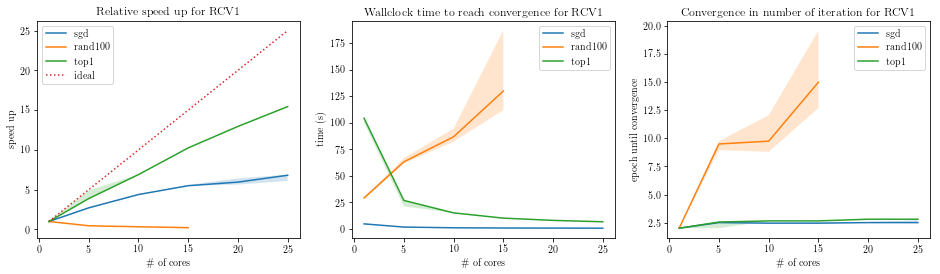

In [689]:
fig = plot_results(results_rcv1, num_samples = 677399, name="RCV1", cut=True)
fig.savefig('figures/cpp_multicore_rcv1.pdf');

In [690]:
with open('../results-thesis/epsilon-par2.pickle', 'rb') as f:
    results_epsilon = pickle.load(f)

results_epsilon['timers'][0,3,1] = 7.30482054
results_epsilon

{'cores': [1, 2, 5, 10, 15, 20, 25],
 'models': ['sgd', 'rand1', 'top1'],
 'repeat': 3,
 'timers': array([[[ 62.57655716,  48.42753601,  47.95521545],
         [ 29.28637886,  23.8364563 ,  27.74538803],
         [ 11.78139114,  11.47453785,  12.2492733 ],
         [  7.9091835 ,   7.30482054,   7.28363037],
         [  5.24163675,   5.89787197,   7.75232887],
         [  6.21732187,   4.25065899,   4.93813801],
         [  4.73352385,   5.40778399,   4.38343477]],
 
        [[ 52.64875031,  49.65016556,  49.47397614],
         [ 39.21317291,  28.30340767,  40.88548279],
         [ 12.24070168,  14.939394  ,  13.10143566],
         [  8.2572298 ,   8.6302948 ,   8.05867386],
         [  7.34573364,   7.57215929,   7.31786203],
         [  6.94852543,   7.78792524,   9.81215763],
         [  6.83782625,   7.51364183,  10.32737827]],
 
        [[ 47.60762024,  43.37117004,  43.25974655],
         [ 26.2709465 ,  20.43932343,  28.86576843],
         [  9.12181091,   8.9997015 ,  11.916785

In [691]:
results_epsilon

{'cores': [1, 2, 5, 10, 15, 20, 25],
 'models': ['sgd', 'rand1', 'top1'],
 'repeat': 3,
 'timers': array([[[ 62.57655716,  48.42753601,  47.95521545],
         [ 29.28637886,  23.8364563 ,  27.74538803],
         [ 11.78139114,  11.47453785,  12.2492733 ],
         [  7.9091835 ,   7.30482054,   7.28363037],
         [  5.24163675,   5.89787197,   7.75232887],
         [  6.21732187,   4.25065899,   4.93813801],
         [  4.73352385,   5.40778399,   4.38343477]],
 
        [[ 52.64875031,  49.65016556,  49.47397614],
         [ 39.21317291,  28.30340767,  40.88548279],
         [ 12.24070168,  14.939394  ,  13.10143566],
         [  8.2572298 ,   8.6302948 ,   8.05867386],
         [  7.34573364,   7.57215929,   7.31786203],
         [  6.94852543,   7.78792524,   9.81215763],
         [  6.83782625,   7.51364183,  10.32737827]],
 
        [[ 47.60762024,  43.37117004,  43.25974655],
         [ 26.2709465 ,  20.43932343,  28.86576843],
         [  9.12181091,   8.9997015 ,  11.916785

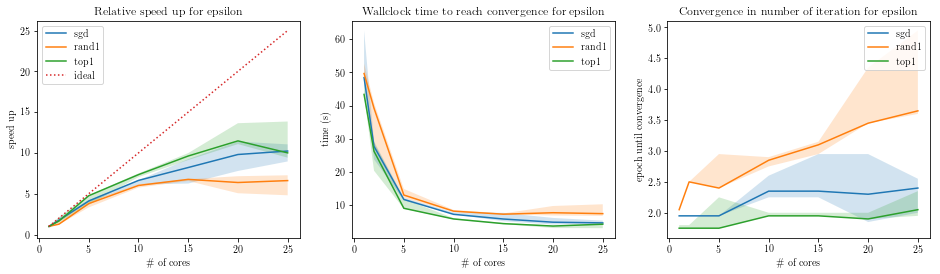

In [692]:
fig = plot_results(results_epsilon, num_samples=400000, name='epsilon')
fig.savefig('figures/cpp_multicore_epsilon.pdf');